In [131]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
myc_data = pd.read_csv('model_data.txt',delimiter='\t')

In [3]:
myc_data

,Myc,label
0,3.119271,1
1,3.995941,1
2,4.207210,1
3,3.234658,1
4,2.484833,1
...,...,...
1995,1.388014,0
1996,1.635738,0
1997,2.293207,0
1998,2.235580,0


<h1> $$ Question\space  1.1$$


<h1> $$ Question\space  1.2$$

In [145]:
LG_myc = LogisticRegression().fit(myc_data,myc_data['label'])

In [146]:
predicted_data = LG_myc.predict_proba(myc_data)

In [147]:
X = predicted_data[:,0]
y = predicted_data[:,1]

In [148]:
predicted_data

array([[0.00988723, 0.99011277],
       [0.00643234, 0.99356766],
       [0.00579813, 0.99420187],
       ...,
       [0.99275871, 0.00724129],
       [0.99296066, 0.00703934],
       [0.9942749 , 0.0057251 ]])

<AxesSubplot:>

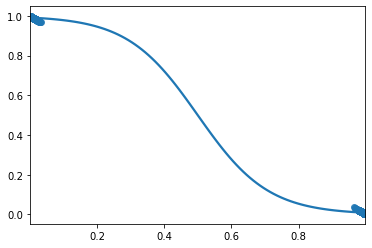

In [149]:
sns.regplot(x=X, y=y, data=myc_data, logistic=True, ci=None)

<h1> $$ Question\space  1.3$$

In [150]:
fpr, tpr, thresholds = metrics.roc_curve(myc_data['label'],y,pos_label=2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


In [151]:
print(fpr)
print('')
print(tpr)
print('')
print(thresholds)

[0.00e+00 5.00e-04 9.99e-01 1.00e+00]

[nan nan nan nan]

[1.99844525 0.99844525 0.00244621 0.00234212]


In [153]:
metrics.auc(myc_data['label'],y)
#metrics.auc(X,y)

0.49633317308531344

<h1> $$ Question\space  1.4$$

In [34]:
kf = KFold(n_splits=5, random_state=None)

In [50]:
model = LogisticRegression(solver = 'liblinear')
X = myc_data['Myc']
y = myc_data['label']
acc_score = []
k = 5

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit((np.array(X_train)).reshape(len(X_train),1),(np.array(y_train)))
    pred_values = model.predict((np.array(X_test)).reshape(len(X_test),1))
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

average_acc_score = sum(acc_score) / k

print('')
print('average accuracy score is:',average_acc_score)

TRAIN: [ 400  401  402 ... 1997 1998 1999] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

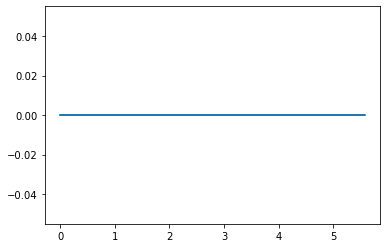

In [51]:
plt.plot(X_test,y_test)

<h1> $$ Question\space  1.5$$

Yes, I would say that the model is efficient enough to handle patients from a control

<h1> $$ Question\space  2.1$$

In [17]:
seq_data = []

with open('sequence_motif.txt') as f:
    text = f.read()

for i in range(len(text)):
    seq_data.append(text[i])

In [18]:
print(seq_data)

['a', 'a', 'g', 'c', 'c', 't', 'g', 'c', 'c', 't', 't', 'T', 'A', 'A', 'T', 'G', 'C', 't', 'g', 'g', 'g', 'g', 'c', 't', 'g', 't', 'c', 'c', 'a', 't', 'c', 't', 'a', 'g', 'c', 'g', 'g', 'c', 't', 'c', 'c', 'a', 't', 'a', 'a', 'c', 't', 'g', 't', 'c', 't', 'c', 'c', 'c', 'a', 't', 't', 'a', 'g', 't', 'a', 't', 'c', 'c', 'a', 'c', 'c', 't', 'a', 'g', 'g', 'c', 'g', 'c', 'a', 'a', 'a', 'a', 'c', 'c', 'a', 'g', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'g', 't', 'g', 'g', 'c', 'a', 'g', 'g', 't', 'a', 't', '\n', 'a', 'a', 't', 'a', 'c', 'g', 'c', 'c', 'g', 'a', 'c', 't', 'c', 't', 'a', 'g', 'g', 'g', 'c', 'a', 'c', 'g', 'c', 'a', 't', 't', 't', 'a', 't', 't', 'c', 'c', 'g', 'a', 'T', 'A', 'A', 'T', 'G', 'T', 'g', 't', 'g', 'g', 'g', 'c', 'c', 'g', 'a', 't', 'a', 'c', 't', 't', 'c', 'a', 't', 'g', 't', 'c', 'g', 'g', 't', 'c', 'g', 'a', 'c', 'g', 'g', 'a', 'g', 'g', 'a', 't', 'a', 'g', 'a', 't', 't', 'c', 'g', 'g', 'g', 't', 'a', 'c', 'c', 'g', 'c', 'a', 't', 'c', 'g', 'c', 'c', 'c', 't', 't', 'a'

In [19]:
binding_sites = []

for i in range(len(seq_data)):
    if seq_data[i].isupper():
        binding_sites.append(seq_data[i])

In [20]:
A = 0
T = 0
C = 0
G = 0


for i in range(len(seq_data)):
    if seq_data[i] == 'A':
        A += 1
    if seq_data[i] == 'G':
        G += 1
    if seq_data[i] == 'T':
        T += 1
    if seq_data[i] == 'C':
        C += 1

In [21]:
print(binding_sites)

['T', 'A', 'A', 'T', 'G', 'C', 'T', 'A', 'A', 'T', 'G', 'T', 'A', 'A', 'A', 'T', 'G', 'T', 'T', 'A', 'A', 'T', 'C', 'C', 'T', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'A', 'T', 'G', 'C', 'G', 'A', 'A', 'T', 'G', 'A', 'T', 'A', 'C', 'T', 'G', 'C', 'T', 'A', 'A', 'T', 'C', 'T', 'T', 'A', 'A', 'T', 'G', 'C', 'T', 'A', 'A', 'T', 'G', 'C', 'G', 'A', 'A', 'G', 'G', 'C']


In [22]:
#divide the frequency matrix by 0.25 (the background frequency of each nucleotide) and take the log2 of result.

freq_matrix = np.array([A,C,T,G]) / (1/6)

print('Frequency Matrix:',freq_matrix)

Position_Weight_Matrix = np.log2(freq_matrix)
print('')

print('Position Weight Matrix [A,C,T,G]:',Position_Weight_Matrix)

Frequency Matrix: [156.  66. 132.  78.]

Position Weight Matrix [A,C,T,G]: [7.28540222 6.04439412 7.04439412 6.28540222]


In [23]:
Position_Weight_Matrix = 0

<h1> $$ Question\space  2.2$$

The heights of the different nucleotides represent how much information the nucleotides have

<h1> $$ Question\space  3.1$$

In [27]:
enhancer_data = pd.read_csv('enhancer_histone.txt',delimiter='\t')

In [28]:
enhancer_data

,ID,label,H3k4me1,H3k4me3,H3k27ac,H3k27me3,H3k36me3
0,enhancer_1,1,0.000168,1.089799,3.706677,1.839418,1.000414
1,enhancer_2,1,0.355099,0.000000,2.247742,1.591764,0.000000
2,enhancer_3,1,0.001236,0.000000,2.940914,0.814211,2.696122
3,enhancer_4,1,0.690140,0.000000,0.687331,0.000000,0.527291
4,enhancer_5,1,1.376770,0.631267,2.090756,1.581667,0.793976
...,...,...,...,...,...,...,...
995,control_496,0,1.539002,0.499277,0.000000,1.934047,0.000000
996,control_497,0,0.004665,0.356522,0.000000,1.646765,0.198733
997,control_498,0,0.368634,2.356287,1.937731,0.684271,1.801650
998,control_499,0,0.000000,1.668051,0.000000,1.213437,0.403462


In [156]:
#P represents partitions in accordance with the columns of the original data

p_one, p_two, p_three, p_four, p_five = shuffle(enhancer_data['H3k4me1'],enhancer_data['H3k4me3'],
                    enhancer_data['H3k27ac'],enhancer_data['H3k27me3'], enhancer_data['H3k36me3'])

p_label = shuffle(enhancer_data['label'])

In [184]:
np.shape(([[p_one],[p_two]]))

p_one

#np.shape(X)

660    0.140345
291    3.798905
411    4.019728
685    0.000000
570    0.000000
         ...   
697    1.424927
931    0.000000
518    0.966867
716    0.000000
347    0.099942
Name: H3k4me1, Length: 1000, dtype: float64

In [158]:
X = np.array([[p_one],[p_two],[p_three],[p_four],[p_five]])
y = np.array([0,1,1,0,1])
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)
print(skf)
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [3 4] TEST: [0 1 2]
TRAIN: [0 1 2] TEST: [3 4]


In [139]:
clf = RandomForestClassifier()

In [182]:
clf.fit(X,y)

ValueError: Found array with dim 3. Estimator expected <= 2.

<h1> $$ Question\space  3.2$$

In [ ]:
#plt.plot(ROC_curves)

<h1> $$ Question\space  3.3$$

The random forest AUC has a better score than the logistic regression AUC

<h1> $$ Question\space  4$$

1) The hidden states of the figure are the cell-specific enhancers

2) The observable signal sequences along the genome are the active regulatory regions // euchromatin domains

3) The Emission Probabilities would be our observations of the active regulatory regions

4) The Transition Probabilities would be our timed observations between active regulatory regions becoming inactive and vice versa

5) The hidden state paths we want to observe are the cell-specific enhancers